In [1]:
from matplotlib import pyplot as plt
import astropy.units as u
import numpy as np
from exo_finder.data_pipeline.generation.dataset_generation import TransitProfile
from exo_finder.data_pipeline.generation.time_generation import generate_time_days_of_length
from exo_finder.data_pipeline.generation.transit_generation import PlanetType, PeriodFrequency,generate_transits_from_params, generate_transit_parameters
from exo_finder.default_datasets import gaia_dataset

In [2]:
fields = ["gaia_id", "radius", "mass_flame", "teff_mean"]
gaia_df = gaia_dataset.load_gaia_parameters_dataset().to_pandas()[fields].dropna()
print("Dataset size:", len(gaia_df))

Dataset size: 236728


Star 5277198386427150720: Radius 0.9333929121494293, Mass 0.9621164798736572, Teff 5380.51025390625


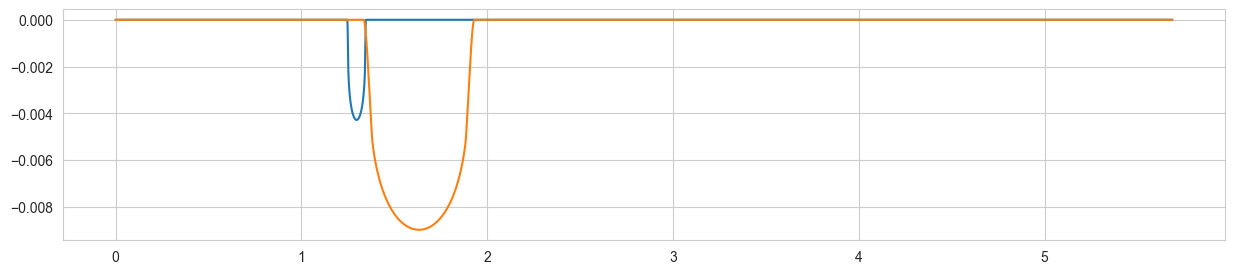

In [3]:
sample = gaia_df.sample(1)
radius, mass, teff = sample["radius"].item(), sample["mass_flame"].item(), sample["teff_mean"].item()
print(f"Star {sample['gaia_id'].item()}: Radius {radius}, Mass {mass}, Teff {teff}")
mass = mass * u.solMass
radius = radius * u.solRad
teff = teff * u.K

params_e = generate_transit_parameters(
    planet_type=PlanetType.NEPTUNE,
    orbital_period_interval=PeriodFrequency.THREE_TO_TEN_DAYS,
    star_radius=radius,
    star_mass= mass,
    transit_midpoint_range=(1, 2),
)

params_j = generate_transit_parameters(
    planet_type=PlanetType.JUPITER,
    orbital_period_interval=(1000, 1000),
    star_radius=radius,
    star_mass= mass,
    transit_midpoint_range=(1, 2),
)

x = generate_time_days_of_length(2**12)
transits_e = generate_transits_from_params(params_e, x)
transits_j = generate_transits_from_params(params_j, x)

plt.figure(figsize=(15, 3))
plt.plot(x, transits_e)
plt.plot(x, transits_j)
plt.show()

### Generate dataset and study the distribution of parameters

In [16]:
# Hot Jupyters: short period, at least 2 transits
hot_jupyters = TransitProfile(
    planet_type=PlanetType.JUPITER,
    transit_period_range=(1, 10),
    transit_midpoint_range=(0, 5),
    weight=1,
)
n = 1000

rndgen = np.random.default_rng(8)
sample_stars = gaia_df.sample(n, replace=True, random_state=8)

all_params = []
for i, row in sample_stars.iterrows():
    all_params.append(generate_transit_parameters(
        planet_type=hot_jupyters.planet_type,
        orbital_period_interval=hot_jupyters.transit_period_range,
        star_radius=row["radius"] * u.solRad,
        star_mass=row["mass_flame"] * u.solMass,
        transit_midpoint_range=hot_jupyters.transit_midpoint_range,
        rnd_generator=rndgen
    ).to_numpy())

all_params = np.vstack(all_params)

(1000, 11)


/Users/christian/git/exo-finder/exo_finder/data_pipeline/generation/limb_darkening.py:78: UserWarning: Temperature [3410.57427917] outside calibrated range (4000-7500 K), using clamped value.
  warnings.warn(f"Temperature {t_eff} outside calibrated range (4000-7500 K), using clamped value.")
